# Ví dụ 1

In [151]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(y.shape)

(1, 60)


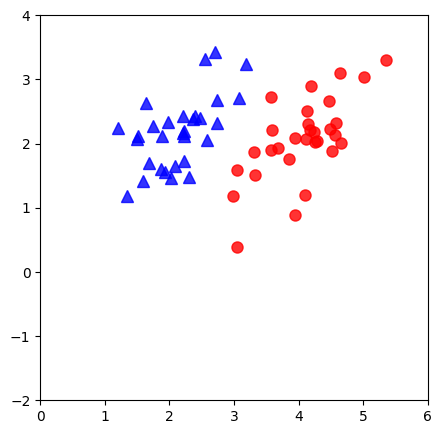

In [152]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [10]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
  return np.sign(np.dot(w.T, x))

In [11]:
#Stop condition
def has_converged(X, y, w):
  return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [155]:
def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = [] # set of miss position points
  while True:
    # mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(3, 1)
      yi = y[0, mix_id[i]]
      print(h(w[-1], xi)[0].shape)
      print(yi.shape)
      if h(w[-1], xi)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi*xi
        w.append(w_new)
    if has_converged(X, y, w[-1]):
      break 
  return (w, mis_points)

In [156]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()
(1,)
()


In [157]:
def draw_line(w):
  w0, w1, w2 = w[0], w[1], w[2]
  if w2 != 0:
    x11, x12 = -100, 100
    return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
  else:
    x10 = -w0/w1
  return plt.plot([x10, x10], [-100, 100], 'k')


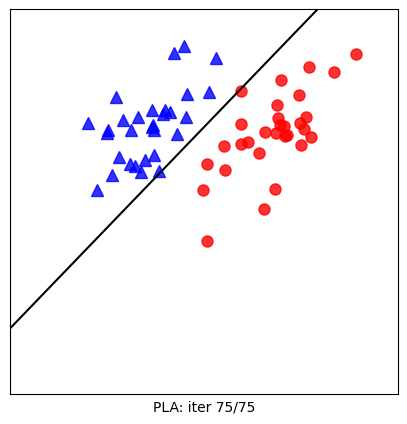

In [158]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
  it = len(w)
  fig, ax = plt.subplots(figsize=(5, 5))

  def update(i):
    ani = plt.cla()
    #points
    ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
    ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
    ani = plt.axis([0 , 6, -2, 4])
    i2 = i if i < it else it-1
    ani = draw_line(w[i2])
    if i < it-1:
# draw one misclassified point
      circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=False)
      ax.add_artist(circle)
# hide axis
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    label = 'PLA: iter %d/%d' %(i2, it-1)
    ax.set_xlabel(label)
    return ani, ax
  anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
  # save
  anim.save('D:\\pla_vis.gif', dpi = 100, writer = 'imagemagick')
  plt.show()
viz_alg_1d_2(w)

# Ví dụ 2

In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
main_df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_8/data/sonar.all-data.csv', header = None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

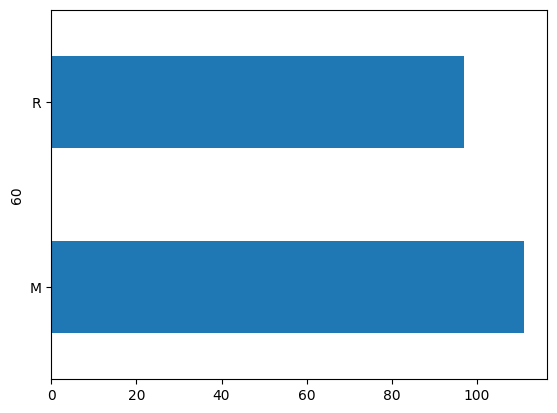

In [161]:
main_df[60].value_counts().plot(kind='barh')

In [181]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = np.array([targes_label[item] for item in y_df])
print(targes_df.shape)

(208,)


In [182]:
inputs_df = main_df.drop(60, axis=1)

In [183]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)
print(X.shape)

(208, 61)


In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)
print(X_train.shape)
print(y_test.shape)

(145, 61)
(63,)


## a)

In [185]:
def perceptron(X, y, w_init, learning_rate = 1e-5, max_iter = 100000):
  w = [w_init]
  N = X.shape[0]
  mis_points = [] # set of miss position points
  it = 0
  d = X.shape[1]
  while it <= max_iter:
    # mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[mix_id[i], :].reshape(1, d)
      yi = y[mix_id[i]]
      if h(w[-1].T, xi.T)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + learning_rate * yi*xi
        w.append(w_new)
    if has_converged(X.T, y, w[-1].T):
      break
    if it % 10 == 0:
      print(it) 
    it += 1
  return (w, mis_points)

In [167]:
d = X.shape[1]
np.random.seed(42)
w_init = np.random.randn(1, d)
print(w_init)
(w, m) = perceptron(X_train, y_train, w_init)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
   0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
  -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
   0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
   1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
  -0.47917424]]
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630

## b)

In [168]:
w_final = w[-1]
y_pred = h(w[-1].T, X_test.T).T
print(y_pred.shape)

(63, 1)


In [169]:
from sklearn.metrics import accuracy_score, recall_score, precision_score 
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.6666666666666666
Recall: 0.6857142857142857
Precision: 0.7058823529411765


## c)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### Logistic Regression

In [171]:
lr = LogisticRegression(max_iter=100000, solver='lbfgs', penalty='l2')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'Precision: {precision_score(y_test, y_pred_lr)}')

Accuracy score: 0.8095238095238095
Recall: 0.8571428571428571
Precision: 0.8108108108108109


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Naive Bayes

In [172]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred_nb)}')
print(f'Recall: {recall_score(y_test, y_pred_nb)}')
print(f'Precision: {precision_score(y_test, y_pred_nb)}')

Accuracy score: 0.7777777777777778
Recall: 0.6571428571428571
Precision: 0.92


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Ví dụ 3

In [176]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,

cancer_data.target,
test_size=0.3,random_state=109)
print(X_train.shape)
print(y_train.shape)

(398, 30)
(398,)


## 1)

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer_data.data)


## 2)

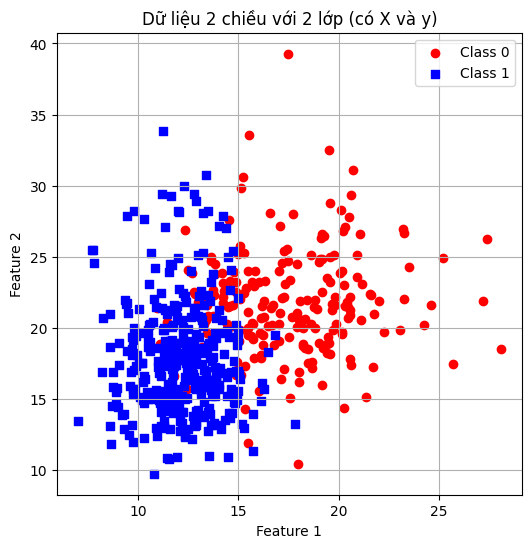

In [178]:
plt.figure(figsize=(6,6))

for label, color, marker in zip(np.unique(cancer_data.target), ['red', 'blue'], ['o', 's']):
    plt.scatter(cancer_data.data[cancer_data.target == label, 0], cancer_data.data[cancer_data.target == label, 1],
                color=color, marker=marker, label=f'Class {int(label)}')

plt.title("Dữ liệu 2 chiều với 2 lớp (có X và y)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 3)

### Perceptron

In [210]:
d = X_train.shape[1]
np.random.seed(42)
w_init = np.random.randn(1, d)
print(w_init)
(w, m) = perceptron(X_train, y_train, w_init, learning_rate = 1e-3, max_iter=20000)
w_final = w[-1]

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
   0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
  -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
   0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
   1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
  -0.47917424]]
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630

In [211]:
y_pred = h(w[-1].T, X_test.T).T
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.7301587301587301
Recall: 0.7428571428571429
Precision: 0.7647058823529411


### Logistic Regression

In [212]:
lr = LogisticRegression(max_iter=10000, penalty = 'l2', solver = 'lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'Precision: {precision_score(y_test, y_pred_lr)}')

Accuracy score: 0.8095238095238095
Recall: 0.8571428571428571
Precision: 0.8108108108108109


# Ví dụ 4:

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_8/data/framingham.csv')

y =  df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)
if X.isna().sum().sum() > 0:
  X = X.fillna(X.mean())

X = X.to_numpy()
y = y.to_numpy()
y = np.where(y == 0, -1, y)
print(y)
print(df.head())

[-1 -1 -1 ... -1 -1 -1]
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0         

<Axes: ylabel='TenYearCHD'>

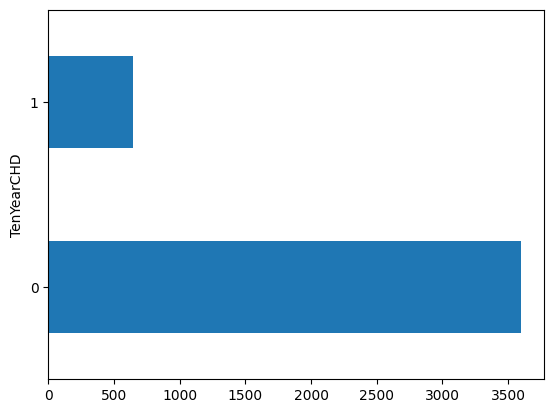

In [4]:
df['TenYearCHD'].value_counts().plot(kind='barh')

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.1531919  -1.23495068  2.00708772 ...  0.28694273  0.34274444
  -0.21751656]
 [-0.86715836 -0.41825733  0.02090466 ...  0.71932499  1.59027451
  -0.26131108]
 [ 1.1531919  -0.18491638 -0.97218687 ... -0.11350221 -0.07309892
  -0.52407818]
 ...
 [-0.86715836 -0.18491638  0.02090466 ... -0.93404582  0.67541912
   0.17663409]
 [-0.86715836 -0.65159829 -0.97218687 ... -1.63175357  0.84175647
   0.        ]
 [-0.86715836  0.28176554  0.02090466 ... -1.06425185  0.34274444
   1.09631895]]


## Giảm chiều bằng PCA 

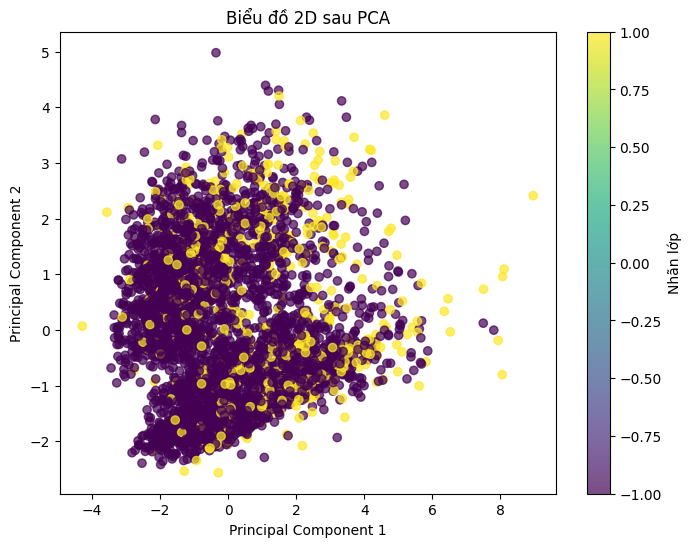

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biểu đồ 2D sau PCA')
plt.colorbar(label='Nhãn lớp')
plt.show()


## 2)

### a)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

Perceptron

In [12]:
def perceptron(X, y, w_init, learning_rate = 1e-5, max_iter = 100):
  w = [w_init]
  N = X.shape[0]
  mis_points = [] # set of miss position points
  it = 0
  d = X.shape[1]
  while it <= max_iter:
    # mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[mix_id[i], :].reshape(1, d)
      yi = y[mix_id[i]]
      if h(w[-1].T, xi.T)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + learning_rate * yi*xi
        w.append(w_new)
    if has_converged(X.T, y, w[-1].T):
      break
    if it % 50 == 0:
      print(it) 
    it += 1
  return (w, mis_points)



In [13]:
print(X_train.shape)
print(X.shape)
d = X.shape[1]
np.random.seed(42)
w_init = np.random.randn(1, d)
print(w_init)
w, m = perceptron(X_train, y_train, w_init, max_iter=1000)

(2966, 15)
(4238, 15)
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
   0.24196227 -1.91328024 -1.72491783]]
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [14]:
w_final = w[-1]
y_pred = h(w[-1].T, X_test.T).T
print(y_pred.shape)
print(y_pred[:10])
print(y_test[:10])

(1272, 1)
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[ 1 -1  1 -1 -1 -1 -1 -1 -1 -1]


In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score 
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.8333333333333334
Recall: 0.12435233160621761
Precision: 0.3582089552238806


recall và precision thấp là do mất cân bằng dữ liệu

### Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.8474842767295597
Recall: 0.06735751295336788
Precision: 0.48148148148148145


### Naive Bayes

In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.8073899371069182
Recall: 0.15544041450777202
Precision: 0.26785714285714285


Mô hình Naive Bayes và Logistic Regression đều cho ra kết quả có xu hướng giống với Mô hình Perceptron, chứng tỏ khẳng định việc mất cân bằng dữ liệu ảnh hưởng lớn tới hiệu suất

## Dữ liệu sau khi giảm chiều

In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Perceptron

In [29]:
N, d = X_train_pca.shape
w_init = np.random.rand(1, d)
w, m = perceptron(X_train_pca, y_train, w_init, learning_rate=1e-5, max_iter=1000)
w_final = w[-1]

y_pred = y_pred = h(w[-1].T, X_test_pca.T).T
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
Accuracy score: 0.5267295597484277
Recall: 0.5077720207253886
Precision: 0.16198347107438016


### Logistic Regression

In [30]:
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.8482704402515723
Recall: 0.031088082901554404
Precision: 0.5


### Naive Bayes

In [31]:
nb.fit(X_train_pca, y_train)
y_pred = nb.predict(X_test_pca)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy score: 0.8427672955974843
Recall: 0.07772020725388601
Precision: 0.40540540540540543


Mô hình Perceptron bị ảnh hưởng nhiều nhất

# Ví dụ 5

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [91]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_8/data/Analysis-Portfolio-Task-Data.csv')
print(df.info())
print(df['Store Type'].value_counts())
df = pd.get_dummies(df, columns=['Gender', 'Store Type'], dtype=int)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           75 non-null     int64  
 1   Shopping Basket      75 non-null     float64
 2   Gender               75 non-null     object 
 3   Age                  75 non-null     int64  
 4   Store Type           75 non-null     object 
 5   Value Products       75 non-null     int64  
 6   Brand Products       75 non-null     int64  
 7   Top Fresco Products  75 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ KB
None
Store Type
Superstore           34
Online               21
Convenient Stores    20
Name: count, dtype: int64


,CustomerID,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products,Gender_Female,Gender_Male,Store Type_Convenient Stores,Store Type_Online,Store Type_Superstore
0,20358063,48.81,26,8,2,1,0,1,1,0,0
1,24635139,33.44,33,6,5,1,1,0,0,0,1
2,27584479,131.57,56,35,8,12,0,1,0,1,0
3,28008212,20.02,27,0,1,1,0,1,1,0,0
4,29130973,95.54,55,38,18,20,1,0,0,1,0


In [92]:
y = df['Shopping Basket']
X = df.drop('Shopping Basket', axis = 1)
y.head()

0     48.81
1     33.44
2    131.57
3     20.02
4     95.54
Name: Shopping Basket, dtype: float64

## Hồi quy tuyến tính

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.6)

In [94]:
linrgr = LinearRegression()
linrgr.fit(X_train, y_train)
y_pred = linrgr.predict(X_test)

print(linrgr.coef_)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('r2_score: ', r2_score(y_test, y_pred))

[-5.69138798e-08  2.65552653e-01  9.18249849e-01  8.25986802e-01
  3.20476603e+00  1.26243676e+00 -1.26243676e+00 -1.00588166e+01
  1.10451598e+01 -9.86343183e-01]
MAE:  15.973195711562653
MSE:  467.49102983917203
r2_score:  0.6672147609165189


## 2)

<Axes: ylabel='Shopping Basket'>

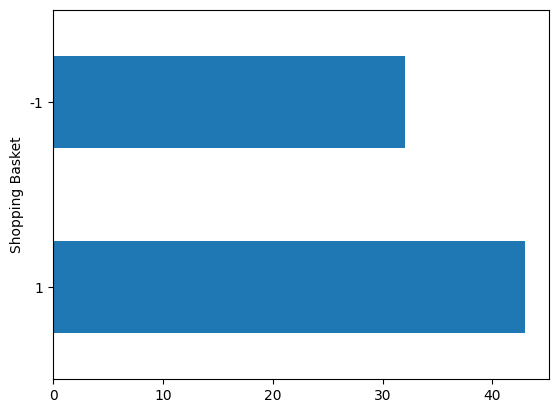

In [95]:
y_neg1 = y.map(lambda x: 1 if x > 50 else -1)
y_0 = y.map(lambda x: 1 if x > 50 else 0)
y_neg1.value_counts().plot(kind ='barh')



In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y_neg1, train_size=0.6, random_state = 42, stratify = y_neg1)

### Perceptron

In [97]:
pct = Perceptron()
pct.fit(X_train, y_train)
y_pred = pct.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.5666666666666667
Recall: 1.0
Precision: 0.5666666666666667
Confusion Matrix: 
 [[ 0 13]
 [ 0 17]]


## Logistic Regression

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y_0, train_size=0.6, random_state = 42, stratify = y_0)

In [99]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.8666666666666667
Recall: 0.8823529411764706
Precision: 0.8823529411764706
[[11  2]
 [ 2 15]]


## Naive Bayes

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y_neg1, train_size=0.6, random_state = 42, stratify = y_0)


In [101]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.8333333333333334
Recall: 0.8235294117647058
Precision: 0.875
[[11  2]
 [ 3 14]]
